# Salary Prediction Model

This notebook implements a machine learning pipeline to predict employee salaries based on different variables.

## Table of Contents:
1. Load and Explore Data
2. Preprocess the Data
3. Train Machine Learning Models
4. Evaluate Model Performance
5. Compare to Baseline
6. Conclusion

### Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from salary_prediction import load_dataset, preprocess_data, split_data, train_model, evaluate_model, train_baseline, evaluate_baseline

### Loading the dataset

In [ ]:
file_path = "Employee_Salary_Dataset.csv"
df = load_dataset(file_path)

### Quick summary of the data

In [ ]:
print("Dataset Preview:")
display(df.head())
print(df.describe())

Dataset Preview:


,Age,Gender,Education Level,Job Title,Years of Experience,Description,Salary
0,33,Male,Master's Degree,Sales Manager,11,Sales Manager with 11 years of experience and ...,93360
1,33,Male,Bachelor's Degree,Product Manager,11,Product Manager with 11 years of experience an...,121657
2,40,Male,Associate's Degree,HR Manager,18,HR Manager with 18 years of experience and a d...,101954
3,53,Male,Bachelor's Degree,Product Manager,31,Product Manager with 31 years of experience an...,159962
4,33,Female,Master's Degree,Data Scientist,11,Data Scientist with 11 years of experience and...,110481


              Age  Years of Experience         Salary
count  200.000000           200.000000     200.000000
mean    43.470000            21.470000  115203.355000
std     12.734597            12.734597   27985.224948
min     22.000000             0.000000   56889.000000
25%     32.750000            10.750000   92291.250000
50%     43.500000            21.500000  117195.000000
75%     54.250000            32.250000  135907.500000
max     65.000000            43.000000  175925.000000


### Visualizing salary distribution

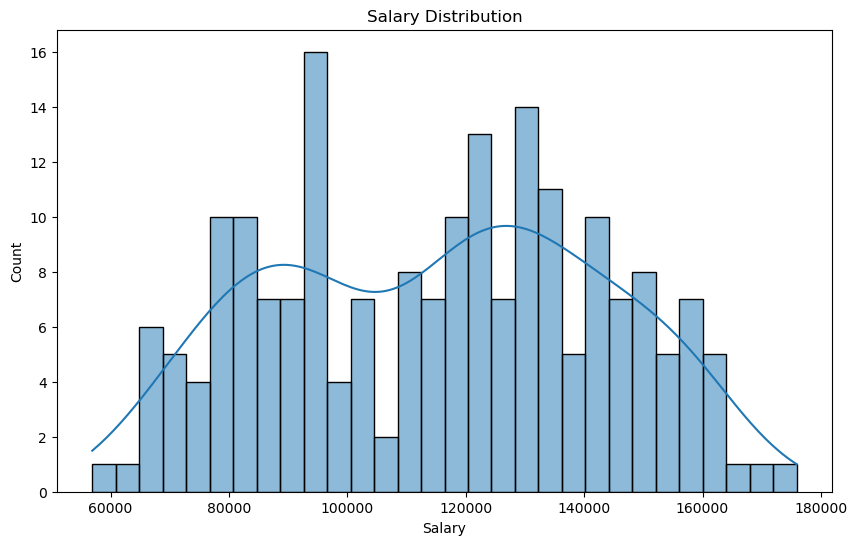

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df["Salary"], bins=30, kde=True)
plt.title("Salary Distribution")
plt.show()

### Data preprocessing
Preprocessing data to take all variables to categorical variables, and scaling the numeric variables

In [ ]:
X, y, encoder, scaler = preprocess_data(df)
X_train, X_test, y_train, y_test = split_data(X, y)

## Training a Random Forest model

Chose to train a Random Forest model with the data, to see its performance

In [ ]:
model = train_model(X_train, y_train)
mae, rmse = evaluate_model(model, X_test, y_test)
print(f"Model MAE: {mae}")
print(f"Model RMSE: {rmse}")

Model MAE: 5101.198362499999
Model RMSE: 6224.583769813047


### Trying a Dummy model
Used a dummy model as a baseline to compare it to the model

In [ ]:
baseline = train_baseline(X_train, y_train)
baseline_mae, baseline_rmse = evaluate_baseline(baseline, X_test, y_test)
print(f"Baseline MAE: {baseline_mae}")
print(f"Baseline RMSE: {baseline_rmse}")

Baseline MAE: 23047.925
Baseline RMSE: 26907.77180773301


## Performance Comparisson

In [ ]:
labels = ["Model", "Baseline"]
mae_values = [mae, baseline_mae]
rmse_values = [rmse, baseline_rmse]

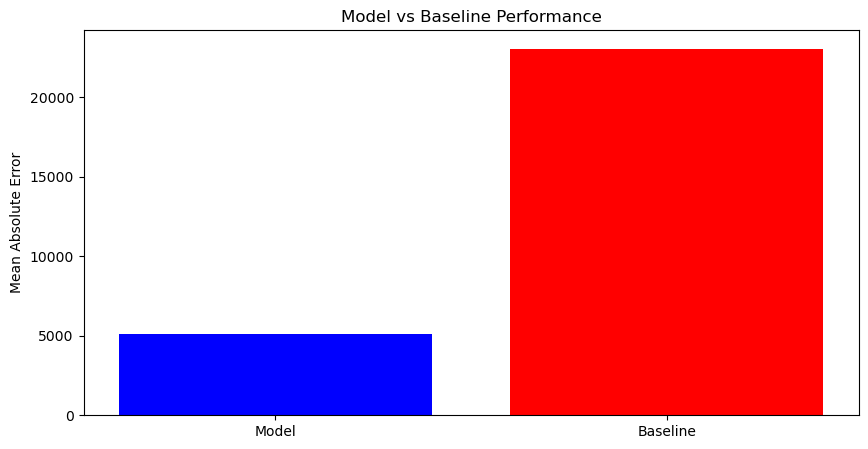

In [43]:
plt.figure(figsize=(10,5))
plt.bar(labels, mae_values, color=['blue', 'red'])
plt.ylabel("Mean Absolute Error")
plt.title("Model vs Baseline Performance")
plt.show()

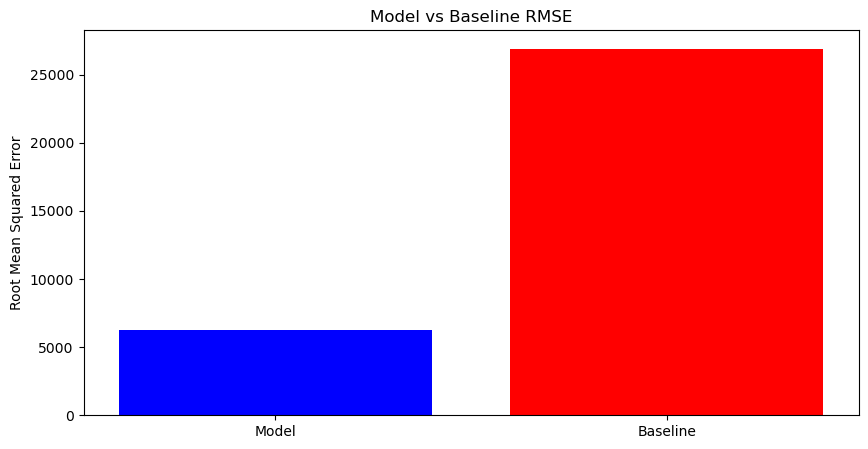

In [44]:
plt.figure(figsize=(10,5))
plt.bar(labels, rmse_values, color=['blue', 'red'])
plt.ylabel("Root Mean Squared Error")
plt.title("Model vs Baseline RMSE")
plt.show()

### Conclusion
The trained Random Forest model significantly outperforms the baseline Dummy Regressor, with a lower Mean Absolute Error and Root Mean Squared Error. 
The model is able to predict employee salaries with a high degree of accuracy based on the given features.

The metrics chosen, MAE and RMSE are useful because:

MAE: It’s simple and easy to interpret since it represents an average error in the same unit as the target variable, and it gives equal weight to all errors, so it’s not sensitive to outliers.

RMSE: Since it squares the errors before averaging, larger errors have a greater impact than smaller ones, which makes RMSE more sensitive to large errors (useful when big mistakes matter more). Besides, it penalizes large salary mispredictions more than MAE, making it a good choice if you want to discourage large salary miscalculations.

We use both because they complement each other: MAE for overall accuracy and RMSE to catch large errors.
